In [1]:
# data processing packages
import numpy as np   
import pandas as pd 

from scipy import stats # look at scipy
from scipy import linalg
from scipy import *
 
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import IPython
from IPython.display import display

import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
import itertools

import random

# machine leanring packages
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [ ]:
# TO DO:
# change dection:
# causal dependence:

In [10]:
def multivariate_ts_plot( dta_df, title_str ):
        
    matplotlib.rcParams.update({'font.size': 15})
    figure_size = (15.4,7)
    legend_font = 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )
    
    tmpt = range(dta_df.shape[0])
    for i in dta_df.columns:
        
        tmpx = list(dta_df[i])    
        plt.plot( tmpt, tmpx, label= i )

    axes = plt.gca()
#     axes.set_xlim([1, tdf.shape[0]+10])
    axes.set_ylim([-200, 300])

    # plt.plot( list( clean_tdf['value']), color='g' )

    # plt.xticks([1,2,3,4,5], ['5','10','15','20','25'] )
    # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    # axes.xaxis.set_ticks( ['5m', '10m', '15m','20m'] ) 
    # axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title( title_str )
    plt.ylabel('Value')
    plt.xlabel('Time')
    # plt.legend( loc='upper left',fontsize=12 )
    plt.legend(loc='upper left')
    #     bbox_to_anchor=(0., 1.0, 1., .10),
    #            loc=0,
    #            ncol=5, mode="expand", borderaxespad=0., fontsize= legend_font , numpoints=1 )
    
    
# parse timestamp to extract seconds
def month_tick( month  ):
    days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31 ]    
    return sum(days[:month-1])*3600*24

def day_tick( day ):
    return (day-1)*3600*24

def hour_tick( hour ):
    return hour*3600

def minutes_tick( minute ):    
    return minute*60

def cal_second_tick( tup, bias ):
    tmp_len = len(tup[4])
    
    return float(tup[0])*0 + month_tick( int(tup[1]) ) +  day_tick( float(tup[2]) ) + \
           hour_tick( float(tup[3]) ) \
           + minutes_tick( float(tup[4][ tmp_len-5 : tmp_len-3 ]) ) + float(tup[4][ tmp_len-2 : tmp_len ]) - bias
    
    
def build_second_col( dta_df, bias ):
    tmpdta = dta_df[['YEAR', 'MONTH', 'DAY', 'HOUR', 'RECEIVETIME']]
    
    return tmpdta.apply( lambda x: cal_second_tick(x, bias), axis=1) 
    

In [ ]:
'TOTALVOLTAGE',
'TOTALCURRENT',

'MAXVOLTAGE',
'MINVOLTAGE',
'NORMALVOLTAGE',

'MAXTEMPERATURE',
'MINTEMPERATURE',
'NORMALTEMPERATURE',

'SOC' ?
'ABVOLTAGE', ?
'ABTEMPERATURE',? 



'BWTID'

'MAXVOLTAGEBOXNUM', 
'MAXVOLTAGEBATTERYNUM', 
'MINVOLTAGEBOXNUM', 
'MINVOLTAGEBATTERYNUM', 

'MAXTEMPERATUREBOXNUM',
'MAXTEMPERATUREBATTERYNUM',
'MINTEMPERATUREBOXNUM',
'MINTEMPERATUREBATTERYNUM',

'RECEIVETIME', 'TIME_DIFF', 'YEAR', 'MONTH', 'DAY', 'HOUR'

In [11]:
addr = "sample_dta.csv"
dta_df = pd.read_csv( addr ,sep=',')

dta_df['SECOND'] =  build_second_col( dta_df, 10791024 )

print 'Shape of the dataset: ', dta_df.shape, dta_df.columns

Shape of the dataset:  (999, 27) Index([u'BWTID', u'TOTALVOLTAGE', u'TOTALCURRENT', u'SOC', u'MAXVOLTAGE',
       u'MAXVOLTAGEBOXNUM', u'MAXVOLTAGEBATTERYNUM', u'MINVOLTAGE',
       u'MINVOLTAGEBOXNUM', u'MINVOLTAGEBATTERYNUM', u'ABVOLTAGE',
       u'NORMALVOLTAGE', u'MAXTEMPERATURE', u'MAXTEMPERATUREBOXNUM',
       u'MAXTEMPERATUREBATTERYNUM', u'MINTEMPERATURE', u'MINTEMPERATUREBOXNUM',
       u'MINTEMPERATUREBATTERYNUM', u'ABTEMPERATURE', u'NORMALTEMPERATURE',
       u'RECEIVETIME', u'TIME_DIFF', u'YEAR', u'MONTH', u'DAY', u'HOUR',
       u'SECOND'],
      dtype='object')


In [12]:
dta_df[['YEAR', 'MONTH', 'DAY', 'HOUR', 'RECEIVETIME', 'SECOND']][:10]

,YEAR,MONTH,DAY,HOUR,RECEIVETIME,SECOND
0,2015,5,5,21,2015/5/5 21:30:24,0
1,2015,5,5,21,2015/5/5 21:30:55,31
2,2015,5,5,21,2015/5/5 21:31:26,62
3,2015,5,5,21,2015/5/5 21:31:58,94
4,2015,5,5,21,2015/5/5 21:32:29,125
5,2015,5,5,21,2015/5/5 21:33:00,156
6,2015,5,5,21,2015/5/5 21:33:30,186
7,2015,5,5,21,2015/5/5 21:34:01,217
8,2015,5,5,21,2015/5/5 21:34:32,248
9,2015,5,5,21,2015/5/5 21:35:03,279


In [ ]:
# TO DO

# change detection
# causal relation, event sequence, peridoicity in event sequence 

In [24]:
def encode_trend(a, b):
    if b < a:
        return 1

    elif b > a:
        return 2
    
    elif abs( b - a ) <= 0.1*a:
        return 0
    

def up_down_stable_trend_extraction( ts_list, timestamp_list ):
    
    h = len(ts_list)
        
    change_cnt   = 0
    change_trend = 0
    
#   ini
    cur_trend = encode_trend(ts_list[0], ts_list[1])
    cur_st    = 0
    
    seg_list = [[] for _ in range(3)]
    
#   sequential processing
    for i in range(1,h):
        
        tmp_trend = encode_trend(ts_list[i-1], ts_list[i])
        
#         print i, tmp_trend, cur_trend
        
        if tmp_trend != cur_trend:
            
            if change_trend == tmp_trend:
                change_cnt += 1
            else:
                change_cnt   = 1
                change_trend = tmp_trend
                    
            if change_cnt >= 2:
                
                seg_list[ cur_trend ].append( ( timestamp_list[cur_st], timestamp_list[i-2] ) )
                
                cur_st    = i-2
                cur_trend = change_trend
    
    seg_list[ cur_trend ].append( ( timestamp_list[cur_st], timestamp_list[h-1] ) )
    
    return seg_list



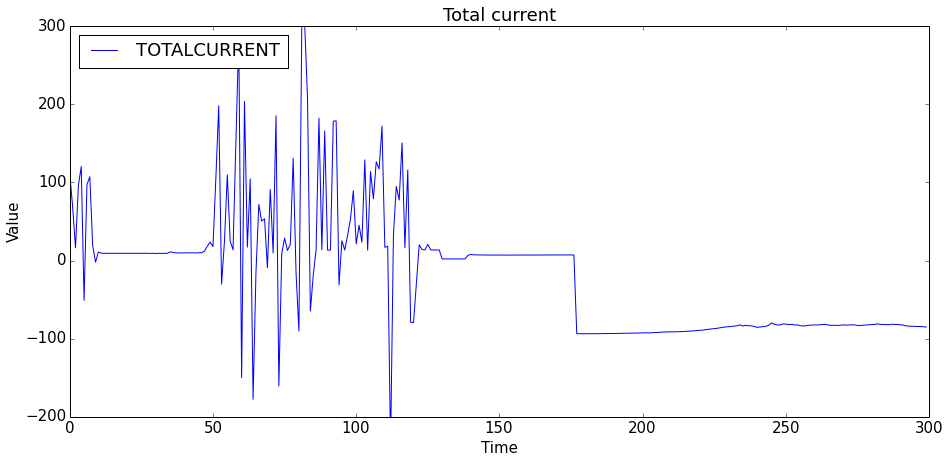

In [23]:
multivariate_ts_plot( dta_df[['TOTALCURRENT']][:300], "Total current" )

In [25]:
ts_dta = list( dta_df[ 'TOTALCURRENT' ][:100] )
timestamp_dta = list( dta_df[ 'SECOND' ][:100] )

seg_set = up_down_stable_trend_extraction( ts_dta, timestamp_dta )

[[(372.0, 1085.0)], [(0.0, 62.0), (186.0, 372.0), (1085.0, 1209.0), (1302.0, 1395.0), (1581.0, 1643.0), (1705.0, 1767.0), (1860.0, 1954.0), (2077.0, 2170.0), (2294.0, 2356.0), (2418.0, 2480.0), (2542.0, 2604.0), (2728.0, 2790.0), (2915.0, 2976.0)], [(62.0, 186.0), (1209.0, 1302.0), (1395.0, 1581.0), (1643.0, 1705.0), (1767.0, 1860.0), (1954.0, 2077.0), (2170.0, 2294.0), (2356.0, 2418.0), (2480.0, 2542.0), (2604.0, 2728.0), (2790.0, 2915.0), (2976.0, 3069.0)]]


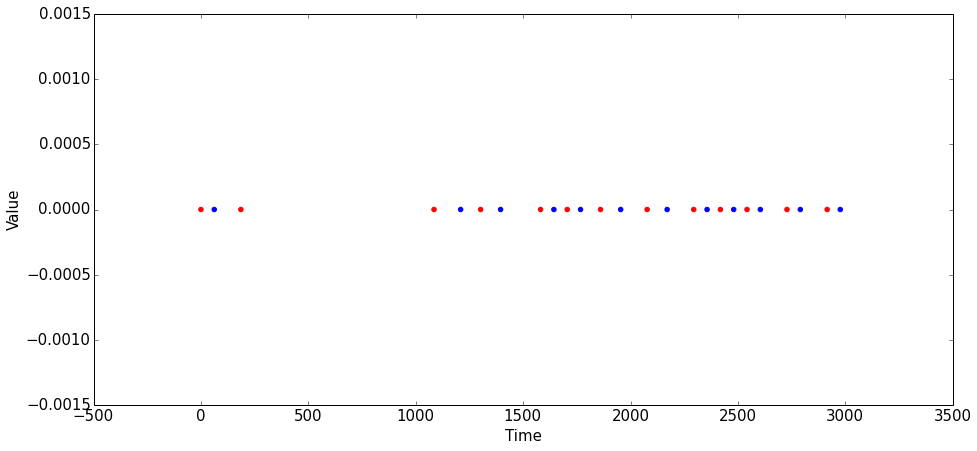

In [39]:
events_down = [ i[0] for i in seg_set[1] ]

events_up = [ i[0] for i in seg_set[2] ]


matplotlib.rcParams.update({'font.size': 15})
figure_size = (15.4,7)
legend_font = 8.5
fig = plt.figure()
fig.set_size_inches( figure_size )
    
plt.scatter( events_down, [0]*len(events_down), color = 'r' )

plt.scatter( events_up, [0]*len(events_up), color = 'b' )

# plt.plot( events, [0]*len(events) )

axes = plt.gca()
#     axes.set_xlim([1, tdf.shape[0]+10])
# axes.set_ylim([-200, 300])

plt.ylabel('Value')
plt.xlabel('Time')
    # plt.legend( loc='upper left',fontsize=12 )
plt.legend(loc='upper left')


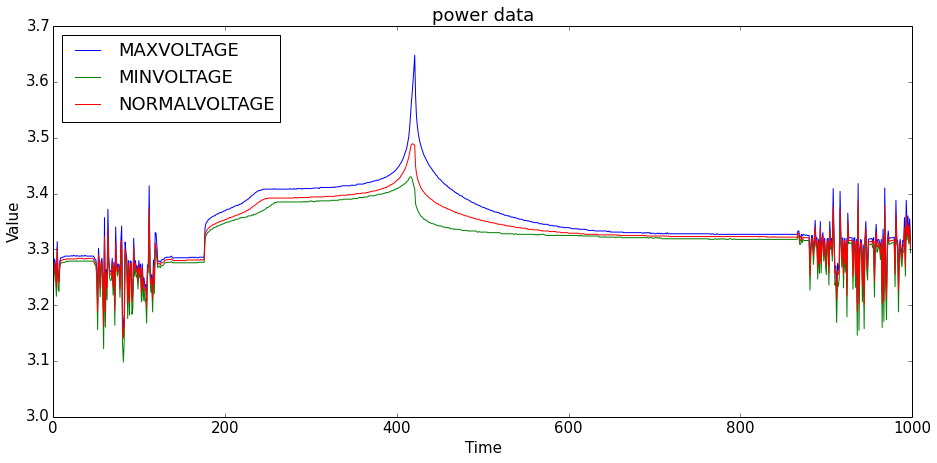

In [18]:
multivariate_ts_plot( dta_df[['MAXVOLTAGE','MINVOLTAGE', 'NORMALVOLTAGE']], "power data" )

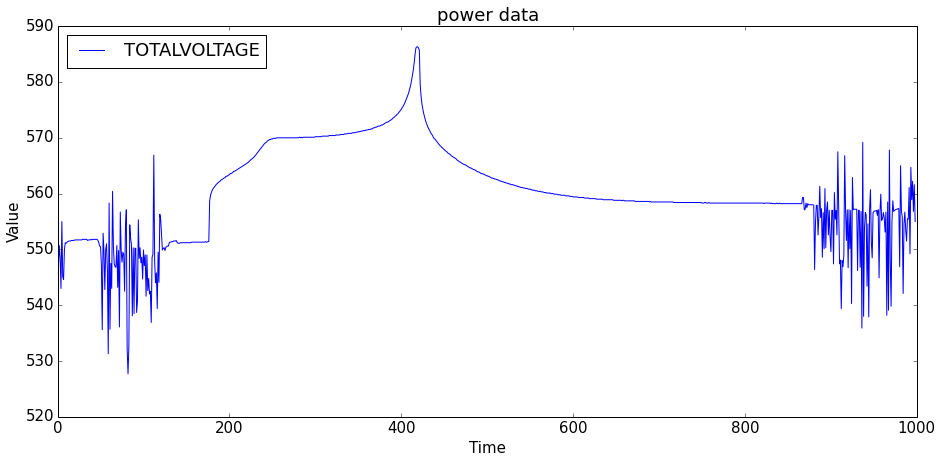

In [19]:
 multivariate_ts_plot( dta_df[['TOTALVOLTAGE']], "power data" )

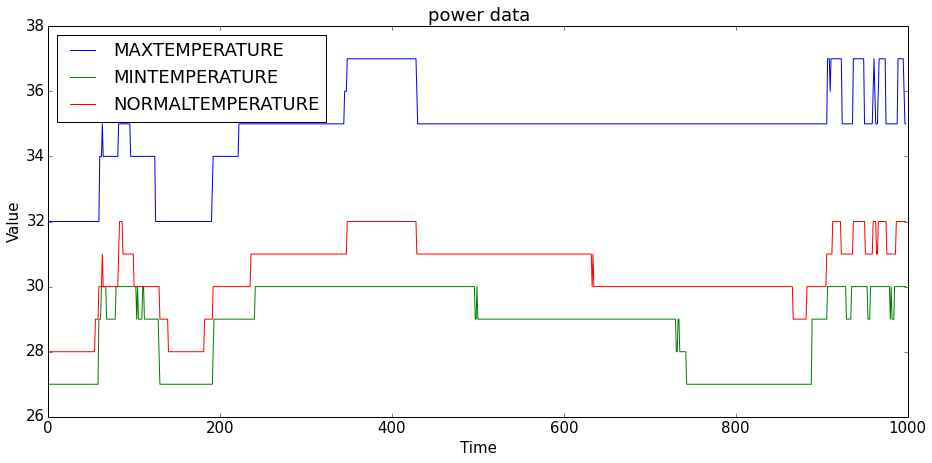

In [20]:
 multivariate_ts_plot( dta_df[['MAXTEMPERATURE','MINTEMPERATURE', 'NORMALTEMPERATURE']], "power data" )

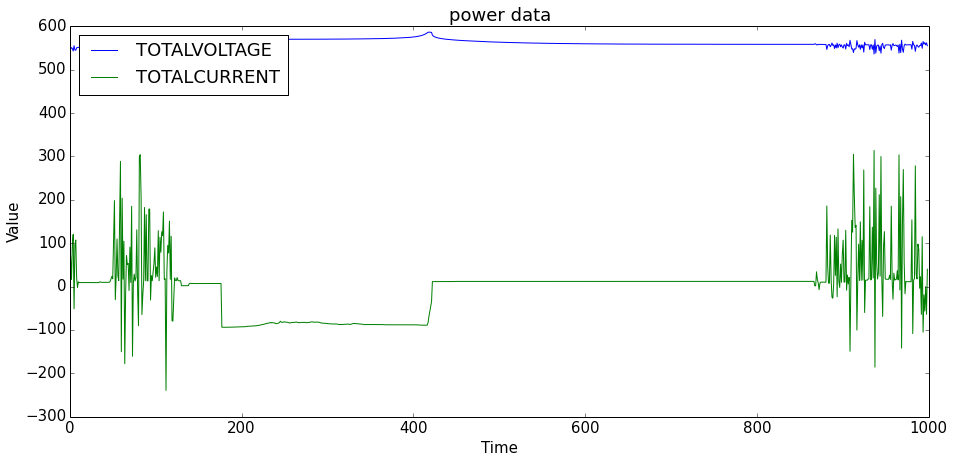

In [21]:
 multivariate_ts_plot( dta_df[['TOTALVOLTAGE','TOTALCURRENT']], "power data" )

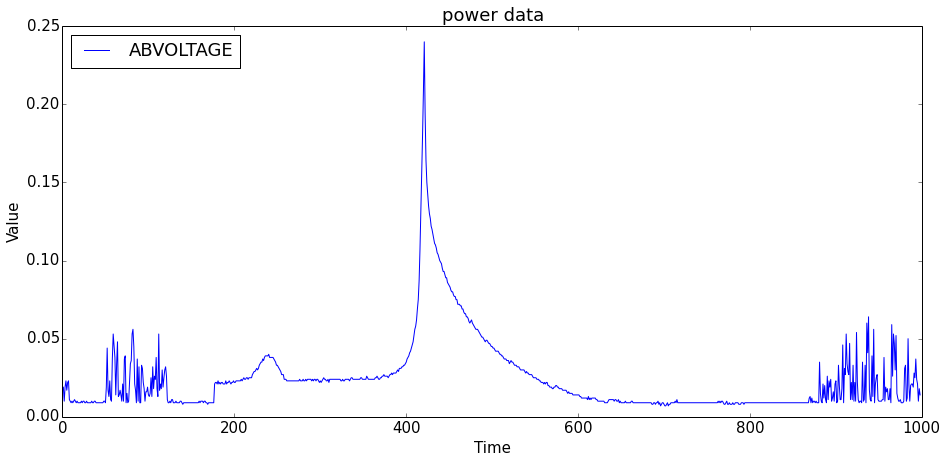

In [7]:
multivariate_ts_plot( dta_df[['ABVOLTAGE']], "power data" )

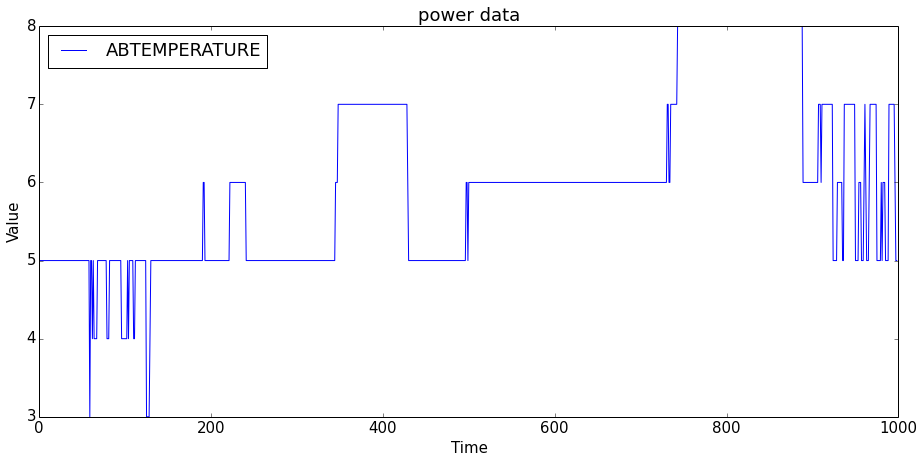

In [8]:
multivariate_ts_plot( dta_df[['ABTEMPERATURE']], "power data" )

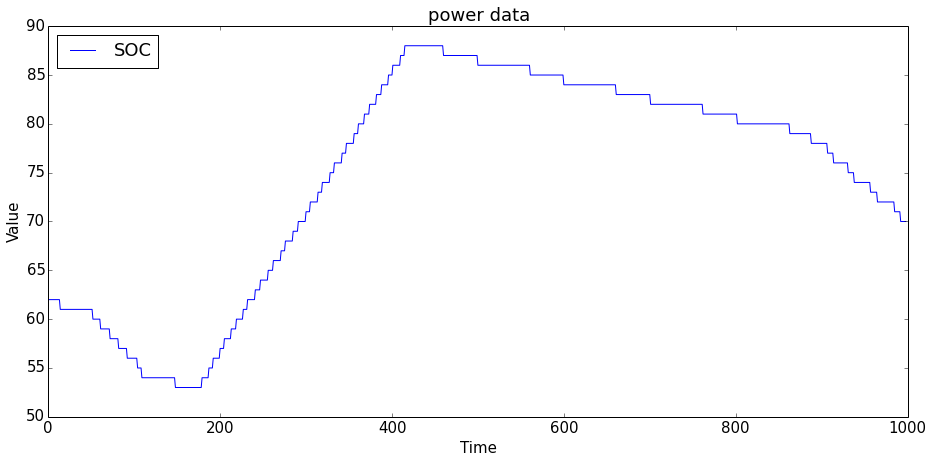

In [9]:
multivariate_ts_plot( dta_df[['SOC']], "power data" )